## Chess Pieces Image Detection with CNN

### Import Required Libraries and Modules

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from glob import glob
import tensorflow_hub as hub
from sklearn.utils import shuffle
from tensorflow import keras

### Collect Image Paths for Each Hurricane Damge Category (damage,no_damage)

In [25]:
bishop_resized=glob('bishop_resized/*.jpg')
knight_resize=glob('knight-resize/*.jpg')
pawn_resized=glob('pawn_resized/*.jpg')
Queen_Resized=glob('Queen-Resized/*.jpg')
Rook_resize=glob('Rook-resize/*.jpg')

### Define Classes and Corresponding Labels


In [26]:
labels={1:'bishop_resized',2:'knight_resize',3:'pawn_resized',4:'Queen_Resized',5:'Rook_resize'}

### Load and Label Images for Each Hurricane Damge Category

In [27]:
images=[]
labels=[]
for i in bishop_resized:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in knight_resize:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in pawn_resized:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)
    
for i in Queen_Resized:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)
    
for i in Rook_resize:
    img=plt.imread(i)
    images.append(img)
    labels.append(5)
    
    

### Plot first few images

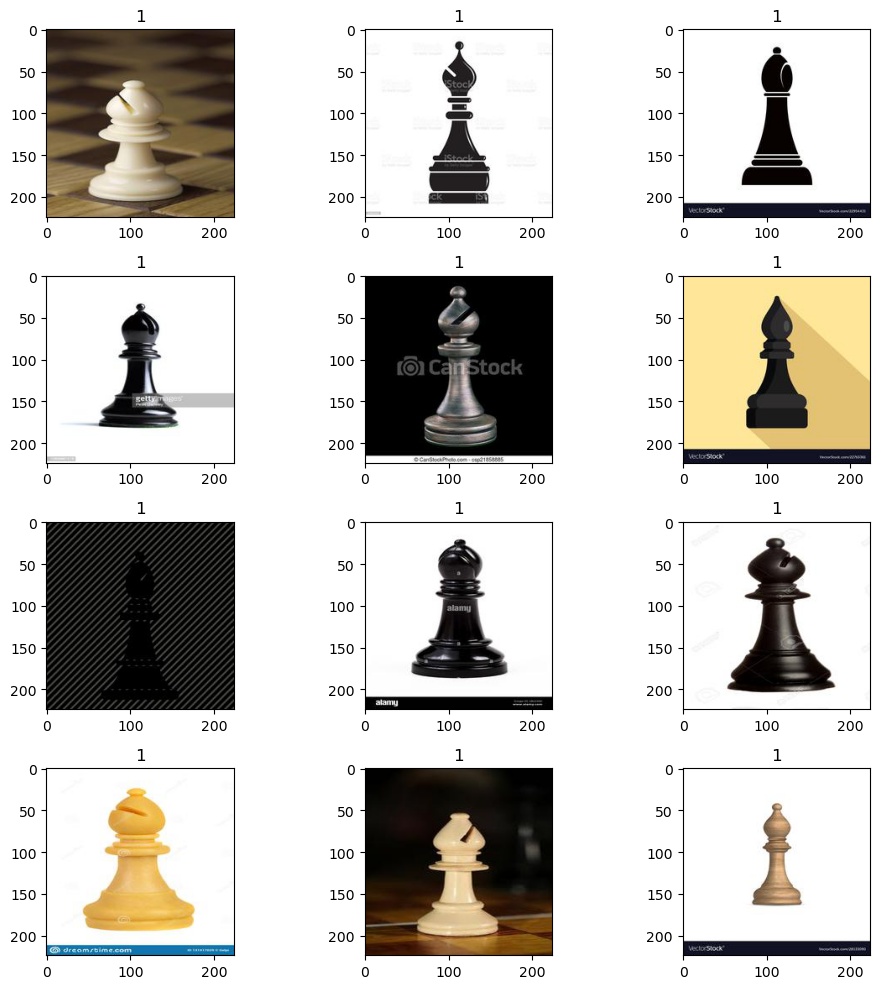

In [28]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(labels[labels[i]])
plt.tight_layout()

### Shuffle the images

In [29]:
images,labels=shuffle(images,labels)

### Plot first few images

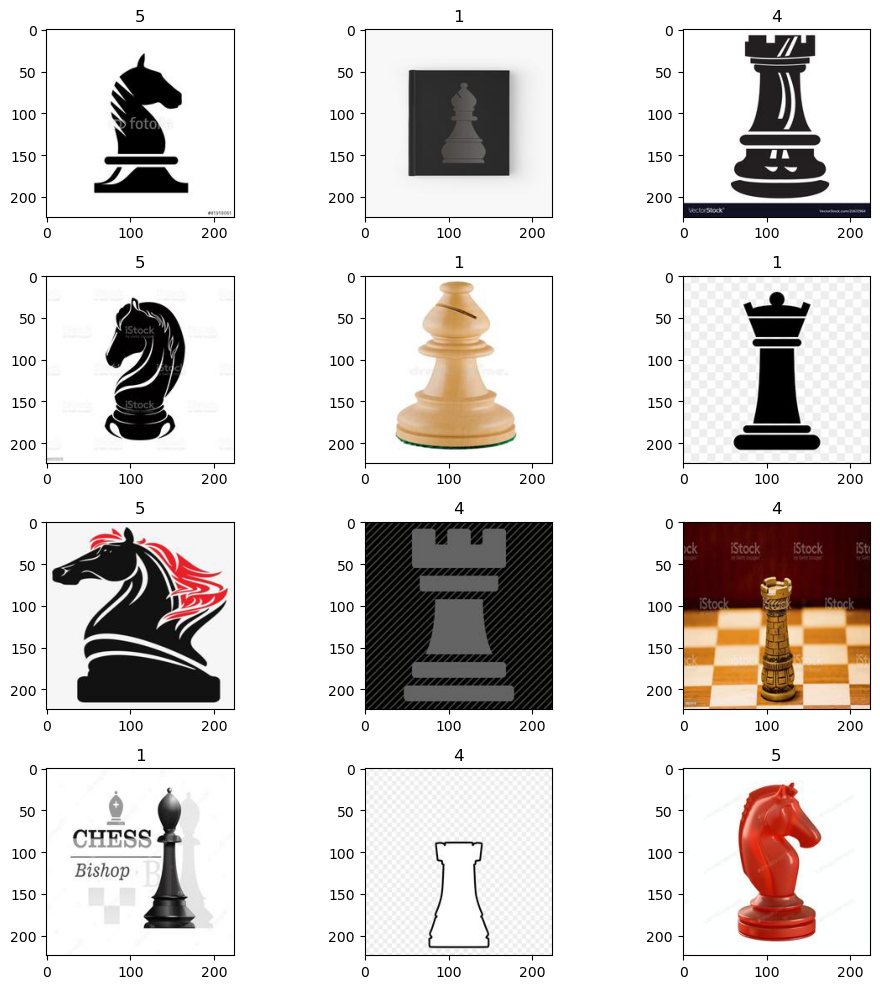

In [30]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(labels[labels[i]])
plt.tight_layout()

### Check the shape of the first 10 images in our list 


In [31]:
for i in range(10):
    print(images[i].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


### Convert image and label datatypes from list to Numpy array

In [32]:
x=np.array(images)
y=np.array(labels)

### Split the Dataset into train,test,split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)

### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [42]:
model=keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D(),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(5,activation='sigmoid'),
    keras.layers.Dense(6,activation='sigmoid')
                
])

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_6 (Dense)             (None, 5)                

## compile the model

In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the model

In [45]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
19/19 [==============================] - 41s 2s/step - loss: 1.8984 - accuracy: 0.2694 - val_loss: 1.7761 - val_accuracy: 0.2188
Epoch 2/10
19/19 [==============================] - 36s 2s/step - loss: 1.7328 - accuracy: 0.2694 - val_loss: 1.7507 - val_accuracy: 0.2188
Epoch 3/10
19/19 [==============================] - 35s 2s/step - loss: 1.7123 - accuracy: 0.2694 - val_loss: 1.7285 - val_accuracy: 0.2188
Epoch 4/10
19/19 [==============================] - 34s 2s/step - loss: 1.6953 - accuracy: 0.2694 - val_loss: 1.7096 - val_accuracy: 0.2188
Epoch 5/10
19/19 [==============================] - 33s 2s/step - loss: 1.6827 - accuracy: 0.2694 - val_loss: 1.6926 - val_accuracy: 0.2188
Epoch 6/10
19/19 [==============================] - 33s 2s/step - loss: 1.6685 - accuracy: 0.2694 - val_loss: 1.6783 - val_accuracy: 0.2188
Epoch 7/10
19/19 [==============================] - 35s 2s/step - loss: 1.7004 - accuracy: 0.2694 - val_loss: 1.6556 - val_accuracy: 0.2188
Epoch 8/10
19/19 [==

### Evaluate the model

In [60]:
model.evaluate(x_train,y_train)


20/20 [==============================] - 7s 322ms/step - loss: 1.8042 - accuracy: 0.2229


[1.8042455911636353, 0.22291994094848633]

### Make predictions with X_test

In [61]:
pred=model.predict(x_test)

1/1 [==============================] - 1s 522ms/step


### Use np.argmax to fetch indices of max element of the array

In [63]:
pred=[np.argmax(i)for i in pred]

### check accuracy of the dataset

In [65]:
accuracy_score(y_test,pred)

0.14285714285714285

### Visualise confusion matrix on a heatmap

<Axes: >

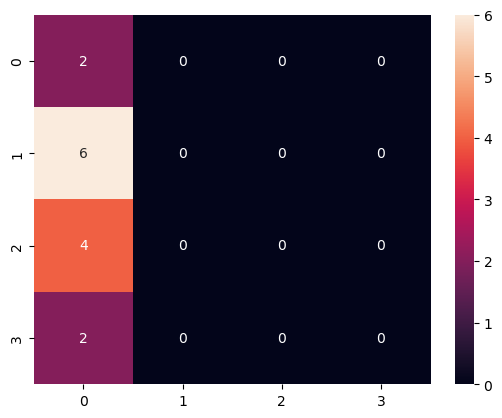

In [68]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

### print classification report

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.14      1.00      0.25         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.14        14
   macro avg       0.04      0.25      0.06        14
weighted avg       0.02      0.14      0.04        14



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
